### Importing Libraries

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
con=sqlite3.connect("airbnb.db")

### Importing Data

#### There are 4 tables : Calander, Listings, Hosts and Reviews

In [2]:
calendar= pd.read_sql_query("select * from calendar",con)
calendar=pd.DataFrame(calendar)


listings= pd.read_sql_query("select * from listings",con)
listings=pd.DataFrame(listings)

hosts= pd.read_sql_query("select * from hosts",con)
hosts=pd.DataFrame(hosts)

reviews= pd.read_sql_query("select * from reviews",con)
reviews=pd.DataFrame(reviews)

### Reading Data

### Calendar

In [3]:
calendar.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


<AxesSubplot:>

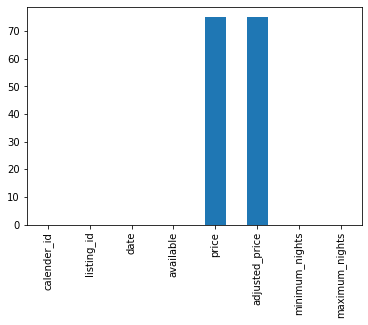

In [5]:
calendar.isna().sum().plot(kind='bar')

#### taking the latest values of the listings in calendar table

In [6]:
c = calendar.sort_values('date').groupby('listing_id').last()

In [7]:
c=c.reset_index()

In [8]:
calendar.shape,c.shape

((319192, 8), (1749, 8))

In [9]:
c.isna().sum()

listing_id        0
calender_id       0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [10]:
c.drop(axis=1,columns=['date','adjusted_price','calender_id'],inplace=True)

### Listings

In [11]:
listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


<AxesSubplot:>

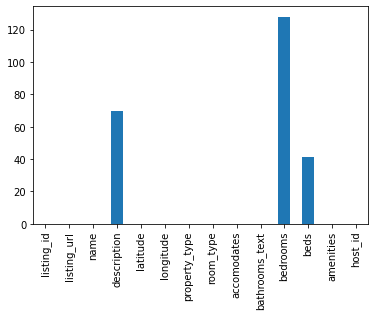

In [13]:
listings.isna().sum().plot(kind='bar')

### Hosts

In [14]:
hosts.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",None
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [15]:
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


<AxesSubplot:>

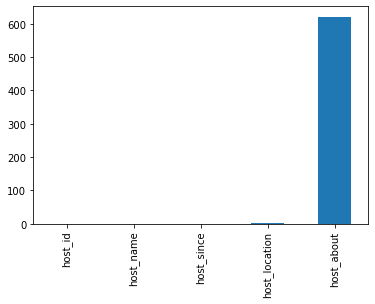

In [16]:
hosts.isna().sum().plot(kind='bar')

In [17]:
hosts.drop(axis=1,columns=['host_about'],inplace=True)

### Reviews

In [18]:
reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [19]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62923 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


<AxesSubplot:>

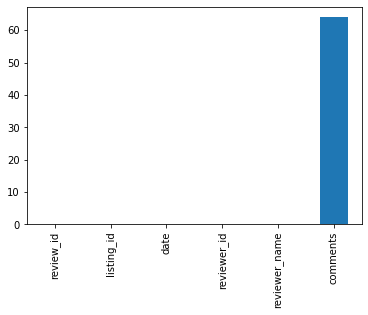

In [20]:
reviews.isna().sum().plot(kind='bar')

In [21]:
rev=reviews.groupby('listing_id').count().reset_index().loc[:,['listing_id','comments']]

### Merging Tables

In [22]:
merge =pd.merge(c,listings)

In [23]:
merge.shape

(1749, 18)

In [24]:
merge=pd.merge(merge,hosts)

In [25]:
merge.shape

(1749, 21)

In [26]:
merged=pd.merge(merge,rev,how='left')

In [27]:
merged.shape

(1749, 22)

In [28]:
merged.head()

,listing_id,available,price,minimum_nights,maximum_nights,listing_url,name,description,latitude,longitude,...,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,comments
0,50904,0,165.0,1,60,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,...,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",2.0
1,891884,0,175.0,1,1125,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,...,2,1 private bath,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",2.0
2,891907,1,225.0,3,1125,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,...,4,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",6.0
3,2543695,1,210.0,2,1125,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,...,4,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",15.0
4,116134,1,150.0,2,1125,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,...,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,Paul,2011-05-14 00:00:00.000000,"Kapellen, Flanders, Belgium",120.0


#### Saving the merged table to a csv file

In [29]:
merged.to_csv("airbnb.csv",index=False)

In [30]:
df=pd.read_csv('airbnb.csv')

In [31]:
df.shape

(1749, 22)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   available       1749 non-null   int64  
 2   price           1749 non-null   float64
 3   minimum_nights  1749 non-null   int64  
 4   maximum_nights  1749 non-null   int64  
 5   listing_url     1749 non-null   object 
 6   name            1749 non-null   object 
 7   description     1679 non-null   object 
 8   latitude        1749 non-null   float64
 9   longitude       1749 non-null   float64
 10  property_type   1749 non-null   object 
 11  room_type       1749 non-null   object 
 12  accomodates     1749 non-null   int64  
 13  bathrooms_text  1749 non-null   object 
 14  bedrooms        1621 non-null   float64
 15  beds            1708 non-null   float64
 16  amenities       1749 non-null   object 
 17  host_id         1749 non-null   i

In [33]:
df.drop(axis=1,columns=["listing_id",'listing_url',"name","host_id","host_name","host_location","description"],inplace=True)

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
available,1749.0,0.501429,0.500141,0.000000,0.00000,1.00000,1.00000,1.00000
price,1749.0,118.440823,201.874365,14.000000,60.00000,79.00000,120.00000,5800.00000
minimum_nights,1749.0,5.392224,21.459729,1.000000,1.00000,2.00000,3.00000,500.00000
maximum_nights,1749.0,813.343625,518.645234,1.000000,365.00000,1125.00000,1125.00000,9999.00000
latitude,1749.0,51.214069,0.013740,51.160084,51.20787,51.21654,51.22088,51.34940
longitude,1749.0,4.413165,0.019373,4.290770,4.40024,4.40946,4.42466,4.48347
accomodates,1749.0,3.761578,2.771378,1.000000,2.00000,3.00000,4.00000,16.00000
bedrooms,1621.0,1.529303,1.091453,1.000000,1.00000,1.00000,2.00000,20.00000
beds,1708.0,2.220726,2.227509,1.000000,1.00000,2.00000,3.00000,44.00000
comments,1525.0,41.260984,64.735349,1.000000,5.00000,17.00000,47.00000,648.00000


In [35]:
df.describe(include='object').T

,count,unique,top,freq
property_type,1749,39,Entire rental unit,981
room_type,1749,4,Entire home/apt,1379
bathrooms_text,1749,26,1 bath,825
amenities,1749,1656,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",9
host_since,1749,927,2019-12-13 00:00:00.000000,64


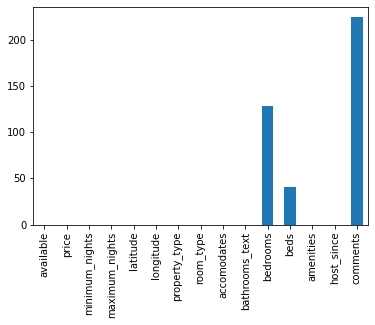

In [36]:
df.isna().sum().plot(kind='bar');

##### Treating host_since

In [37]:
host_ex=[]
for time in df.host_since:
    host_ex.append(time.split("-")[0])
df['host_since_']=host_ex
df['host_exp']=2022-df.host_since_.astype('int')

#### Treating bathroom_text

In [38]:
df['bathrooms_text'].unique()

array(['1 private bath', '1.5 baths', '2.5 baths', '1 bath',
       '2 shared baths', '3 shared baths', 'Shared half-bath',
       '1.5 shared baths', '2 baths', '1 shared bath', '3.5 baths',
       '3 baths', '2.5 shared baths', '8.5 baths', '4 baths', '0 baths',
       '5 baths', 'Half-bath', 'Private half-bath', '4 shared baths',
       '0 shared baths', '6.5 baths', '15.5 baths', '8 baths', '6 baths',
       '7.5 baths'], dtype=object)

In [39]:
df.bathrooms_text.replace(["Shared half-bath",'Half-bath','Private half-bath'],['0.5 shared baths','0.5 baths','0.5 private baths'],inplace=True)

In [40]:
shared = []
for i in range(0,len(df)):
    if 'shared' in df.loc[i,'bathrooms_text']:
        shared.append(1)
    else:
        shared.append(0)
df['shared_bath']=shared

In [41]:
baths=[]
for item in df.bathrooms_text:
    baths.append(item.split(" ")[0])
df['baths']=baths
df['baths']=df.baths.astype('float')

#### Treating comments

In [42]:
df.comments.fillna(0,inplace=True)

<AxesSubplot:>

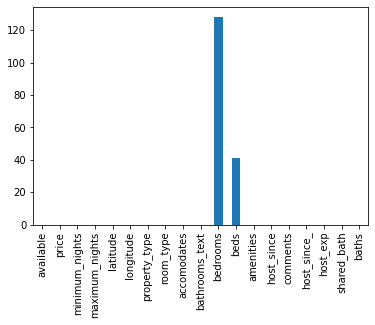

In [43]:
df.isna().sum().plot(kind='bar')

In [44]:
df.drop(axis=1,columns=['bathrooms_text','host_since','host_since_'],inplace=True) 
### droping host_since and bathrooms_text

### Treating amenities

In [45]:
df.amenities

0       ["Kitchen", "Smoke alarm", "Hair dryer", "Keyp...
1       ["Refrigerator", "Kitchen", "Smoke alarm", "Ha...
2       ["Refrigerator", "Kitchen", "Smoke alarm", "Ha...
3       ["Refrigerator", "Kitchen", "Smoke alarm", "Ha...
4       ["Refrigerator", "Elevator", "Paid street park...
                              ...                        
1744    ["Long term stays allowed", "Kitchen", "Smoke ...
1745    ["Refrigerator", "Elevator", "Yamaha RX-A550 s...
1746    ["Hot water", "Long term stays allowed", "Kitc...
1747    ["Refrigerator", "Private garden or backyard",...
1748    ["Kitchen", "Voice command Google  Bluetooth s...
Name: amenities, Length: 1749, dtype: object

In [46]:
amenities=[]
for string in df.amenities:
    a=string.split("[")[1].split("]")[0].split(",")
    for item in a:
        amenities.append(item)
amenities=list(set(amenities))

In [47]:
len(amenities)

538

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   available       1749 non-null   int64  
 1   price           1749 non-null   float64
 2   minimum_nights  1749 non-null   int64  
 3   maximum_nights  1749 non-null   int64  
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bedrooms        1621 non-null   float64
 10  beds            1708 non-null   float64
 11  amenities       1749 non-null   object 
 12  comments        1749 non-null   float64
 13  host_exp        1749 non-null   int32  
 14  shared_bath     1749 non-null   int64  
 15  baths           1749 non-null   float64
dtypes: float64(7), int32(1), int64(5), object(3)
memory usage: 211.9+ KB


In [49]:
df_amenities=pd.DataFrame()
for item in amenities:
    item_bool=[]
    for string in df.amenities:
        if item in string:
            item_bool.append(1)
        else:
            item_bool.append(0)
    df_amenities[item]=item_bool
            

In [50]:
df.shape,df_amenities.shape

((1749, 16), (1749, 538))

In [51]:
df_amenities['property_type']=df.property_type

In [52]:
df.drop(axis=1,columns=['amenities','property_type'],inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   available       1749 non-null   int64  
 1   price           1749 non-null   float64
 2   minimum_nights  1749 non-null   int64  
 3   maximum_nights  1749 non-null   int64  
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   room_type       1749 non-null   object 
 7   accomodates     1749 non-null   int64  
 8   bedrooms        1621 non-null   float64
 9   beds            1708 non-null   float64
 10  comments        1749 non-null   float64
 11  host_exp        1749 non-null   int32  
 12  shared_bath     1749 non-null   int64  
 13  baths           1749 non-null   float64
dtypes: float64(7), int32(1), int64(5), object(1)
memory usage: 184.6+ KB


In [54]:
df.describe(include='object').T

,count,unique,top,freq
room_type,1749,4,Entire home/apt,1379


In [55]:
df.room_type.unique()

array(['Hotel room', 'Entire home/apt', 'Private room', 'Shared room'],
      dtype=object)

In [56]:
df=pd.get_dummies(df,drop_first=True)

In [57]:
df.shape

(1749, 16)

In [58]:
df.to_csv('airbnb_final.csv',index=False)

In [59]:
df_amenities.to_csv('airbnb_amenities.csv',index=False)

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=3)
X=imputer.fit_transform(df)

In [ ]:
df=pd.DataFrame(X,columns=df.columns)